# BAGGING

## Clasificación y regresión usando bagging

In [1]:
import pandas as pd

In [5]:
personas = pd.read_csv("../0.dataset/salarios.csv")
personas

,edad,estudio,horas,clase_salario,valor_salario
0,27,9,40,0,12967.33
1,30,9,40,0,20171.40
2,42,9,40,1,39051.04
3,68,9,25,1,33567.25
4,34,8,40,0,8247.42
...,...,...,...,...,...
95,32,13,55,0,3297.72
96,20,10,25,0,2266.79
97,46,3,40,0,17190.41
98,37,9,45,0,552.72


In [6]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edad           100 non-null    int64  
 1   estudio        100 non-null    int64  
 2   horas          100 non-null    int64  
 3   clase_salario  100 non-null    int64  
 4   valor_salario  100 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [7]:
personas.describe()

,edad,estudio,horas,clase_salario,valor_salario
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,39.740000,9.590000,40.550000,0.300000,16845.790640
std,15.959937,3.008725,12.130915,0.460566,12264.102806
min,17.000000,1.000000,1.000000,0.000000,552.720000
25%,27.000000,9.000000,40.000000,0.000000,5949.565000
50%,35.500000,9.000000,40.000000,0.000000,14097.625000
75%,52.250000,10.000000,45.000000,1.000000,26873.982500
max,80.000000,16.000000,72.000000,1.000000,50000.000000


## N Muestreos para N Modelos

* Bagging se usa muchisimo cuando las tecnicas de aprendizaje maquina pesentan mucha varianza

In [8]:
# realizando 5 muestreos de los datos originales para generar 5 modelos diferentes
for i in range(5):
    print(personas.sample(frac=1/10),"\n")

    edad  estudio  horas  clase_salario  valor_salario
41    27        7     40              1       27872.31
30    20        9     40              0        2285.43
31    45        4     10              0       16407.89
24    35       13     60              0       13489.00
3     68        9     25              1       33567.25
56    34       13     39              0       12717.67
63    23       13     30              0       11712.83
64    56        9     50              0        9750.34
18    17        8     15              1       27096.01
81    34       10     72              1       38097.13 

    edad  estudio  horas  clase_salario  valor_salario
90    59        9     35              1       26872.43
16    80        9     30              1       42516.45
22    59        9     40              1       26878.64
7     20       10     40              0       17190.41
0     27        9     40              0       12967.33
78    52       16     70              1       38094.64
83    36

## Escalamiento de los datos

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(personas)
personas_scaled = scaler_minmax.transform(personas)
personas_scaled

# forma reducida
# personas_scaled = MinMaxScaler().fit_transform(personas)
# personas_scaled

array([[0.15873016, 0.53333333, 0.54929577, 0.        , 0.2510676 ],
       [0.20634921, 0.53333333, 0.54929577, 0.        , 0.39675954],
       [0.3968254 , 0.53333333, 0.54929577, 1.        , 0.77857306],
       [0.80952381, 0.53333333, 0.33802817, 1.        , 0.66767131],
       [0.26984127, 0.46666667, 0.54929577, 0.        , 0.15561422],
       [0.14285714, 0.8       , 0.69014085, 0.        , 0.12572228],
       [0.0952381 , 0.2       , 0.33802817, 0.        , 0.03466478],
       [0.04761905, 0.6       , 0.54929577, 0.        , 0.33647331],
       [0.06349206, 0.6       , 0.1971831 , 0.        , 0.03441342],
       [0.38095238, 0.6       , 0.54929577, 0.        , 0.26111527],
       [0.50793651, 0.13333333, 0.26760563, 0.        , 0.38118558],
       [0.22222222, 0.6       , 0.54929577, 0.        , 0.1103994 ],
       [0.77777778, 0.66666667, 0.4084507 , 1.        , 0.66779689],
       [0.65079365, 0.53333333, 0.54929577, 1.        , 0.5173322 ],
       [0.26984127, 0.8       , 0.

## Visualización de los datos

Estudio, horas, edad -> Salario

In [12]:
import matplotlib.pyplot as plt

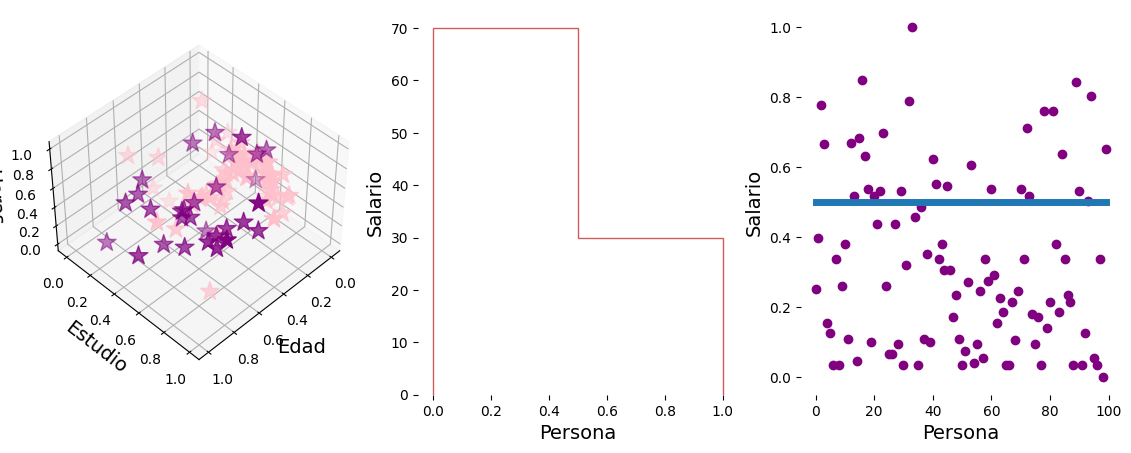

In [15]:
fig = plt.figure(figsize=(14,5)) # lienzo princial

# gráfica de dispersión -> Edad, Estudio y Horas
ax = fig.add_subplot(1,3,1, projection="3d") # lienzo secundario
colores = ("pink", "purple")
for clase in (0, 1):
    ax.scatter(personas_scaled.T[0][personas_scaled.T[3]==clase], 
               personas_scaled.T[1][personas_scaled.T[3]==clase], 
               personas_scaled.T[2][personas_scaled.T[3]==clase],
               marker="*", c=colores[clase], s=200)
ax.set_xlabel("Edad", size=14)
ax.set_ylabel("Estudio", size=14)
ax.set_zlabel("Horas", size=14)
ax.view_init(45, 45)

# Histograma -> clase salarial
ax = fig.add_subplot(1, 3, 2)
ax.hist(personas_scaled.T[3], bins=2, histtype="step", color="indianred")
ax.set_ylabel("Salario", size=14)
ax.set_xlabel("Persona", size=14)
plt.setp(ax.spines.values(), linewidth=0)

# Visualización del salario de las personas
ax = fig.add_subplot(1, 3, 3)
ax.plot(personas_scaled.T[4], marker="o", linewidth=0, color="purple")
ax.plot([0.5]*100, linewidth=5)
ax.set_ylabel("Salario", size=14)
ax.set_xlabel("Persona", size=14)
plt.setp(ax.spines.values(), linewidth=0)
plt.show()

## Creacion de Meta Modelos Bagging

Estimador base: K-NN

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [23]:
# Separar los features de las variables objetivos
datos = personas_scaled.T[:-2].T # features sin los targets
clase = personas_scaled.T[3] # target categório
valor = personas_scaled.T[4] # target numerico

In [24]:
# Clasificador base y regresor base 
clasificador = KNeighborsClassifier(n_neighbors=3)
regresor = KNeighborsRegressor(n_neighbors=3)

In [46]:
n = 1 # números de modelos: 1

# Modelos bagging para clasificación con 30% de muestra
meta_clasificador = BaggingClassifier(estimator=clasificador, 
                                      n_estimators=n, 
                                      max_samples=0.40).fit(datos, clase)
# Modelos bagging para regresión con 30% de muestra
meta_regresor = BaggingRegressor(estimator=regresor, 
                                 n_estimators=n, 
                                 max_samples=0.40).fit(datos, valor)

# Métricas relevantes para clasificación y determinación
print("Accuracy:", 
      accuracy_score(clase, meta_clasificador.predict(datos)))
print("Coeficiente de determinación:", 
      r2_score(valor, meta_regresor.predict(datos)))

Accuracy: 0.83
Coeficiente de determinación: 0.24473374740242537


In [59]:
n = 50 # números de modelos: 50

# Modelos bagging para clasificación con 30% de muestra
meta_clasificador = BaggingClassifier(estimator=clasificador, 
                                      n_estimators=n, 
                                      max_samples=0.40).fit(datos, clase)
# Modelos bagging para regresión con 30% de muestra
meta_regresor = BaggingRegressor(estimator=regresor, 
                                 n_estimators=n, 
                                 max_samples=0.40).fit(datos, valor)

# Métricas relevantes para clasificación y determinación
print("Accuracy:", 
      accuracy_score(clase, meta_clasificador.predict(datos)))
print("Coeficiente de determinación:", 
      r2_score(valor, meta_regresor.predict(datos)))

Accuracy: 0.86
Coeficiente de determinación: 0.38325571208536846
